In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [10]:
#Load the data set
import pandas as pd
#from google.colab import files
#claimants  = files.upload()
claimants = pd.read_csv("C:\\Users\\ayush\\Downloads\\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [11]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [12]:
#Shape of the data set
claimants.shape

(1340, 6)

In [13]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [14]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [15]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
# classifier.write_to_pickle('path of file.pkl')

LogisticRegression()

In [16]:
#Predict for X dataset
# classifer.read_pickle_file('path of file.pkl')
y_pred = classifier.predict(X)

In [10]:
y_pred_df = pd.DataFrame({'actual': Y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})

In [11]:
y_pred_df[20:80]

,actual,predicted
22,0,0
24,1,0
25,1,1
26,1,1
27,0,1
28,1,1
30,1,0
32,1,1
33,0,1
34,0,0


In [12]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
#display(y_pred_df[20:80])
y_pred_df['correct'].mean()
#y_pred_df['correct'].value_counts()


0.708029197080292

In [13]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
395 / (123 + 395)

0.7625482625482626

In [14]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

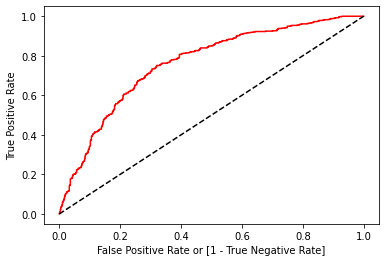

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc

0.7108589063606365

0.017531495905198327


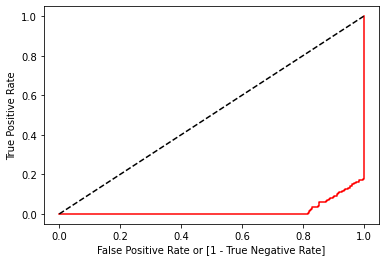

In [ ]:
import numpy as np


probas = [0.505 - np.random.rand()*0.01 for _ in Y]

probas = [
  0.51 - np.random.rand()*0.01 if _y else 0.49 + np.random.rand()*0.01
  for _y in Y
]

acc = np.array([(_y > 0.5) == _y for _y in Y])
acc.mean()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, probas)

auc = roc_auc_score(Y, probas)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

print(auc)